### <center> AIDS CLASSIFICATION </center>

##### IMPORT LIBRARY PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always') 
import shap

# Model Classifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


##### LOAD DATASETS

In [2]:
aids = pd.read_csv('aids_classification.csv')
aids_5000 = pd.read_csv('aids_classification_5000.csv')
aids_15000 = pd.read_csv('aids_classification_15000.csv')
aids_50000 = pd.read_csv('aids_classification_50000.csv')

##### DISPLAY AND CHECK THE DATASET

##### CHECK THE AIDS DATASET

In [3]:
aids.head(10)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
5,1181,1,46,88.9056,0,1,1,100,0,1,...,1,3,0,1,0,235,339,860,1060,0
6,794,0,31,73.0296,0,1,0,100,0,1,...,1,3,0,0,0,244,225,708,699,1
7,957,0,41,66.2256,0,1,1,100,0,1,...,1,3,0,0,0,401,366,889,720,0
8,198,3,40,82.5552,0,1,0,90,0,1,...,1,3,1,1,1,214,107,652,131,1
9,188,0,35,78.0192,0,1,0,100,0,1,...,1,3,0,0,1,221,132,221,759,1


In [4]:
print('The total number of columns and rows of this dataset is,',aids.shape,'respectively')

The total number of columns and rows of this dataset is, (2139, 23) respectively


In [5]:
aids.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [6]:
aids.isna().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [7]:
aids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [8]:
aids.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


##### CHECK THE AIDS 5000 DATASET

In [9]:
aids_5000.head(10)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,988,2,42,71.76131,0,0,0,100,0,1,...,1,3,0,0,0,290,408,1870,1671,0
1,413,3,30,72.67629,0,1,0,100,0,1,...,0,1,0,0,0,506,446,1372,523,0
2,1119,0,37,73.75514,0,1,0,90,0,1,...,1,3,0,0,0,499,542,609,1474,0
3,680,3,34,70.03769,0,0,0,100,0,0,...,0,1,0,1,0,313,478,780,987,0
4,1043,3,35,63.02845,0,0,0,100,0,1,...,0,1,0,1,0,337,761,698,1735,0
5,1181,0,34,71.65247,0,1,0,81,0,0,...,0,1,0,0,0,413,606,952,900,0
6,592,0,43,69.93948,0,1,0,90,0,1,...,1,1,0,0,1,363,571,677,614,0
7,1061,2,36,60.91513,0,1,0,90,0,1,...,1,3,0,1,0,232,295,1985,1407,1
8,973,1,27,61.31507,0,0,0,100,0,1,...,0,3,0,1,0,478,511,806,1071,0
9,553,1,46,62.11188,0,1,0,90,0,1,...,1,3,0,1,0,268,182,1317,959,1


In [10]:
print('The total number of columns and rows of this dataset is,',aids_5000.shape,'respectively')

The total number of columns and rows of this dataset is, (5000, 23) respectively


In [11]:
aids_5000.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [12]:
aids_5000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      5000 non-null   int64  
 1   trt       5000 non-null   int64  
 2   age       5000 non-null   int64  
 3   wtkg      5000 non-null   float64
 4   hemo      5000 non-null   int64  
 5   homo      5000 non-null   int64  
 6   drugs     5000 non-null   int64  
 7   karnof    5000 non-null   int64  
 8   oprior    5000 non-null   int64  
 9   z30       5000 non-null   int64  
 10  preanti   5000 non-null   int64  
 11  race      5000 non-null   int64  
 12  gender    5000 non-null   int64  
 13  str2      5000 non-null   int64  
 14  strat     5000 non-null   int64  
 15  symptom   5000 non-null   int64  
 16  treat     5000 non-null   int64  
 17  offtrt    5000 non-null   int64  
 18  cd40      5000 non-null   int64  
 19  cd420     5000 non-null   int64  
 20  cd80      5000 non-null   int6

In [13]:
aids_5000.isna().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [14]:
aids_5000.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,881.382400,1.375200,34.239800,75.941660,0.033000,0.648000,0.137000,96.893400,0.040600,0.64020,...,0.574400,1.94400,0.081400,0.730800,0.334200,319.791600,436.361600,1048.853000,906.292000,0.31580
std,303.774994,1.235609,6.985732,12.448553,0.178654,0.477642,0.343882,5.013608,0.197381,0.47999,...,0.494483,0.89321,0.273476,0.443588,0.471757,102.370123,141.871757,491.375973,340.454917,0.46488
min,124.000000,0.000000,12.000000,44.424990,0.000000,0.000000,0.000000,78.000000,0.000000,0.00000,...,0.000000,1.00000,0.000000,0.000000,0.000000,115.000000,119.000000,252.000000,236.000000,0.00000
25%,552.000000,0.000000,29.000000,68.039777,0.000000,0.000000,0.000000,90.000000,0.000000,0.00000,...,0.000000,1.00000,0.000000,0.000000,0.000000,236.000000,325.000000,712.000000,649.000000,0.00000
50%,1044.500000,1.000000,34.000000,74.009940,0.000000,1.000000,0.000000,100.000000,0.000000,1.00000,...,1.000000,2.00000,0.000000,1.000000,0.000000,298.000000,416.000000,891.000000,858.000000,0.00000
75%,1136.000000,3.000000,39.000000,81.224572,0.000000,1.000000,0.000000,100.000000,0.000000,1.00000,...,1.000000,3.00000,0.000000,1.000000,1.000000,398.000000,526.000000,1243.250000,1075.000000,1.00000
max,1231.000000,3.000000,62.000000,142.881280,1.000000,1.000000,1.000000,100.000000,1.000000,1.00000,...,1.000000,3.00000,1.000000,1.000000,1.000000,716.000000,1104.000000,4922.000000,3055.000000,1.00000


##### CHECK THE AIDS 15000 DATASET

In [15]:
aids_15000.head(10)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1108,1,37,88.11364,0,1,1,100,0,1,...,1,1,0,0,0,389,320,734,737,1
1,1079,0,43,66.77075,0,0,0,100,0,1,...,0,2,0,1,1,318,432,912,1213,0
2,492,1,34,82.91725,0,0,0,90,0,1,...,1,2,0,1,1,326,524,660,835,0
3,1191,1,41,98.91817,0,0,0,81,0,1,...,1,3,0,1,0,318,232,1131,982,1
4,1141,3,47,53.61717,0,1,0,100,0,0,...,0,1,0,1,0,280,337,515,679,0
5,1071,2,20,62.11097,0,0,0,82,0,1,...,1,1,0,0,0,257,218,1249,1546,0
6,587,2,25,63.88170,1,1,0,100,0,1,...,1,2,0,1,1,199,555,1065,1219,1
7,1145,2,30,75.75620,0,1,0,90,0,1,...,1,2,0,1,1,480,330,830,921,0
8,1047,3,30,89.61961,0,1,0,100,0,0,...,0,1,0,1,0,223,627,663,630,0
9,481,3,40,79.16276,0,1,0,100,0,0,...,1,3,1,0,0,202,177,563,1301,0


In [16]:
print('The total number of columns and rows of this dataset is,',aids_15000.shape,'respectively')

The total number of columns and rows of this dataset is, (15000, 23) respectively


In [17]:
aids_15000.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [18]:
aids_15000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      15000 non-null  int64  
 1   trt       15000 non-null  int64  
 2   age       15000 non-null  int64  
 3   wtkg      15000 non-null  float64
 4   hemo      15000 non-null  int64  
 5   homo      15000 non-null  int64  
 6   drugs     15000 non-null  int64  
 7   karnof    15000 non-null  int64  
 8   oprior    15000 non-null  int64  
 9   z30       15000 non-null  int64  
 10  preanti   15000 non-null  int64  
 11  race      15000 non-null  int64  
 12  gender    15000 non-null  int64  
 13  str2      15000 non-null  int64  
 14  strat     15000 non-null  int64  
 15  symptom   15000 non-null  int64  
 16  treat     15000 non-null  int64  
 17  offtrt    15000 non-null  int64  
 18  cd40      15000 non-null  int64  
 19  cd420     15000 non-null  int64  
 20  cd80      15000 non-null  in

In [19]:
aids_15000.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.0000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,876.719667,1.395333,34.273800,76.019604,0.032000,0.652733,0.127867,96.777533,0.041067,0.645867,...,0.577000,1.937267,0.087933,0.7364,0.348800,318.754800,436.178600,1049.644400,908.306867,0.308733
std,308.105122,1.237880,7.074134,12.170759,0.176006,0.476117,0.333952,5.135257,0.198451,0.478266,...,0.494052,0.894456,0.283207,0.4406,0.476606,102.653183,142.800481,489.881489,337.759073,0.461986
min,68.000000,0.000000,12.000000,42.256390,0.000000,0.000000,0.000000,77.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,111.000000,273.000000,143.000000,0.000000
25%,539.000000,0.000000,29.000000,68.323125,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.0000,0.000000,235.000000,327.000000,716.000000,652.000000,0.000000
50%,1045.000000,1.000000,34.000000,74.114225,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.0000,0.000000,298.000000,413.000000,887.000000,858.000000,0.000000
75%,1137.000000,3.000000,39.000000,81.309035,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.0000,1.000000,396.000000,527.000000,1252.250000,1087.250000,1.000000
max,1231.000000,3.000000,68.000000,141.612390,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.0000,1.000000,996.000000,1119.000000,4867.000000,3253.000000,1.000000


##### CHECK THE AIDS 50000 DATASET

In [20]:
aids_50000.head(10)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0
5,564,2,37,71.87923,0,1,0,90,0,1,...,1,2,0,1,1,520,543,740,694,1
6,406,0,27,86.94414,0,1,0,100,0,1,...,1,2,0,0,0,274,314,1563,664,0
7,1044,1,36,69.46018,0,1,1,90,0,0,...,0,1,0,1,1,338,640,2572,741,0
8,522,0,52,67.55010,0,1,0,100,0,1,...,1,1,0,1,1,418,513,1496,622,0
9,494,2,39,93.49177,0,1,0,100,0,0,...,1,3,1,1,1,375,330,1339,1398,0


In [21]:
aids_50000.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [22]:
aids_50000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

In [23]:
aids_50000.isna().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [24]:
aids_50000.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,877.369780,1.384800,34.164020,75.861991,0.033480,0.653540,0.132220,96.831560,0.042300,0.640880,...,0.575200,1.936420,0.083460,0.734160,0.342220,319.079540,438.090100,1045.936440,905.938440,0.310120
std,307.288688,1.233272,7.091152,12.028730,0.179888,0.475847,0.338733,5.091788,0.201275,0.479747,...,0.494318,0.895318,0.276579,0.441784,0.474458,102.525976,144.806831,488.617434,339.707976,0.462547
min,66.000000,0.000000,12.000000,42.361620,0.000000,0.000000,0.000000,76.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,81.000000,96.000000,173.000000,0.000000
25%,542.000000,0.000000,29.000000,68.253682,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,236.000000,327.000000,713.000000,649.000000,0.000000
50%,1045.000000,1.000000,34.000000,74.054115,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,299.000000,415.000000,885.000000,858.000000,0.000000
75%,1136.000000,3.000000,39.000000,81.142185,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,396.000000,531.000000,1245.000000,1084.000000,1.000000
max,1231.000000,3.000000,68.000000,149.830870,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,930.000000,1119.000000,4656.000000,3538.000000,1.000000


#### EXPLORATORY DATA ANALYSIS, (E.D.A)

##### MERGE ALL THE FOUR DATASETS

In [25]:
# Concatenate the four datasets along rows
merged_data = pd.concat([aids, aids_5000, aids_15000, aids_50000], ignore_index=True)
merged_data 

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.81280,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.44240,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.45200,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.27680,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.67920,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72134,953,3,46,61.28204,0,0,0,90,0,1,...,1,3,0,1,1,234,402,481,1014,0
72135,1036,0,42,73.36768,0,1,0,100,0,1,...,1,3,0,0,1,369,575,514,657,0
72136,1157,0,40,78.75824,0,1,0,100,0,1,...,1,1,0,1,0,308,663,1581,863,0
72137,596,0,31,52.20371,0,0,0,100,0,1,...,1,1,0,1,1,349,440,470,865,1


In [26]:
print('The total number of columns and rows after the merge is',merged_data.shape,'respectively.')

The total number of columns and rows after the merge is (72139, 23) respectively.


##### CHECK FOR MISSING VALUES AFTER THE MERGE

In [27]:
merged_data.isna().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

array([[<AxesSubplot: title={'center': 'time'}>,
        <AxesSubplot: title={'center': 'trt'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'wtkg'}>,
        <AxesSubplot: title={'center': 'hemo'}>],
       [<AxesSubplot: title={'center': 'homo'}>,
        <AxesSubplot: title={'center': 'drugs'}>,
        <AxesSubplot: title={'center': 'karnof'}>,
        <AxesSubplot: title={'center': 'oprior'}>,
        <AxesSubplot: title={'center': 'z30'}>],
       [<AxesSubplot: title={'center': 'preanti'}>,
        <AxesSubplot: title={'center': 'race'}>,
        <AxesSubplot: title={'center': 'gender'}>,
        <AxesSubplot: title={'center': 'str2'}>,
        <AxesSubplot: title={'center': 'strat'}>],
       [<AxesSubplot: title={'center': 'symptom'}>,
        <AxesSubplot: title={'center': 'treat'}>,
        <AxesSubplot: title={'center': 'offtrt'}>,
        <AxesSubplot: title={'center': 'cd40'}>,
        <AxesSubplot: title={'center': 'cd420'}>],
 

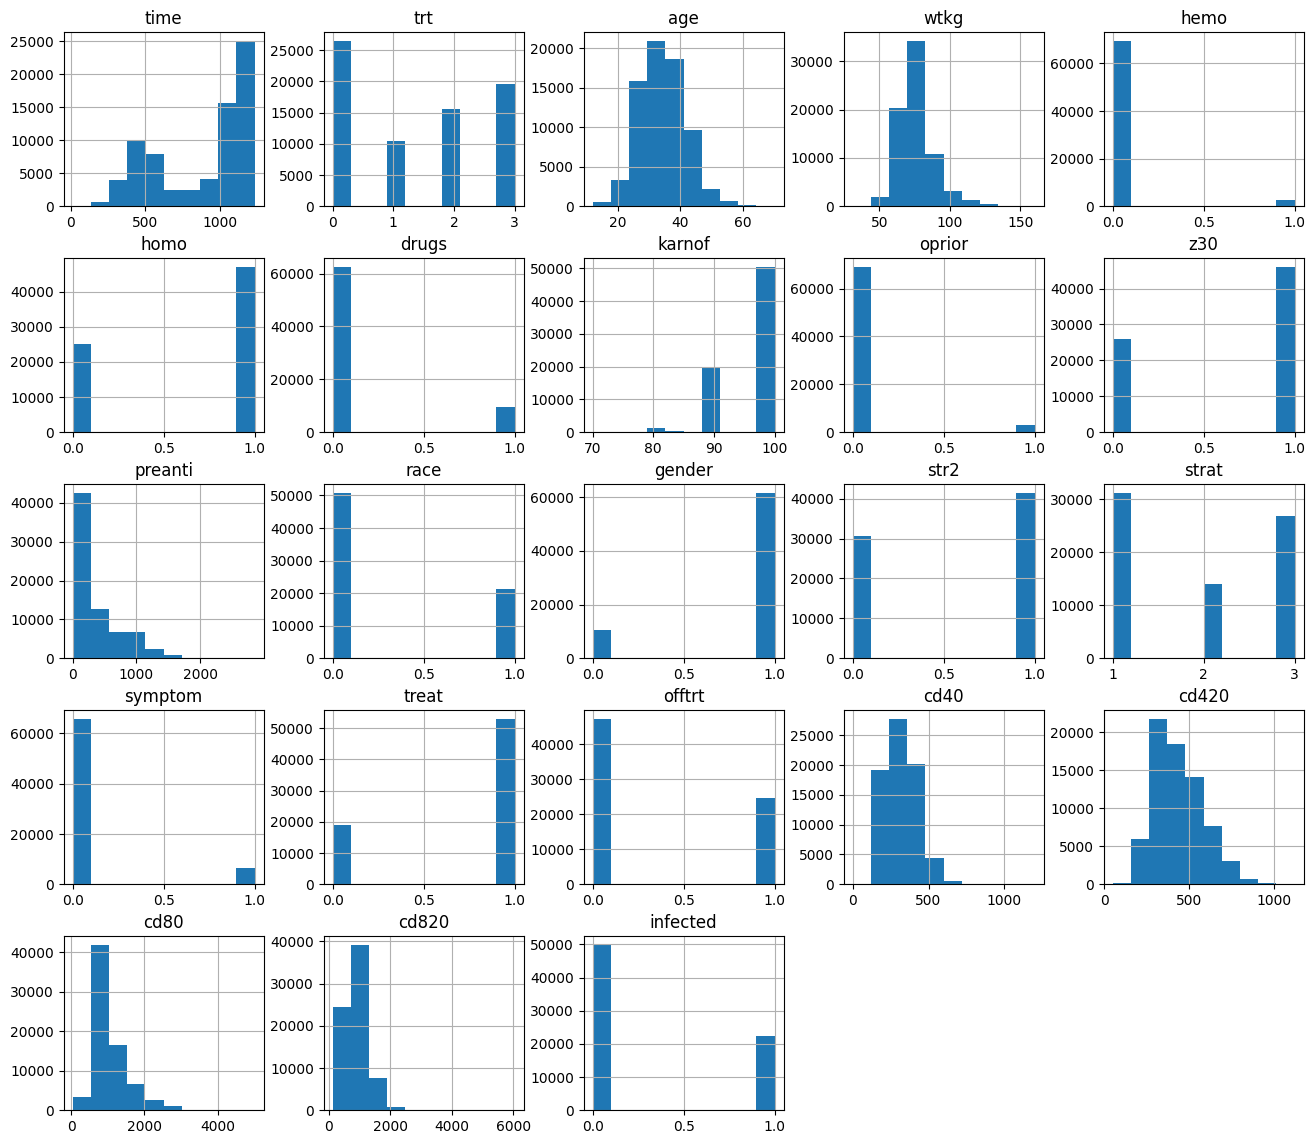

In [28]:
merged_data.hist(figsize = (16,14))

##### CORRELATION HEATMAP

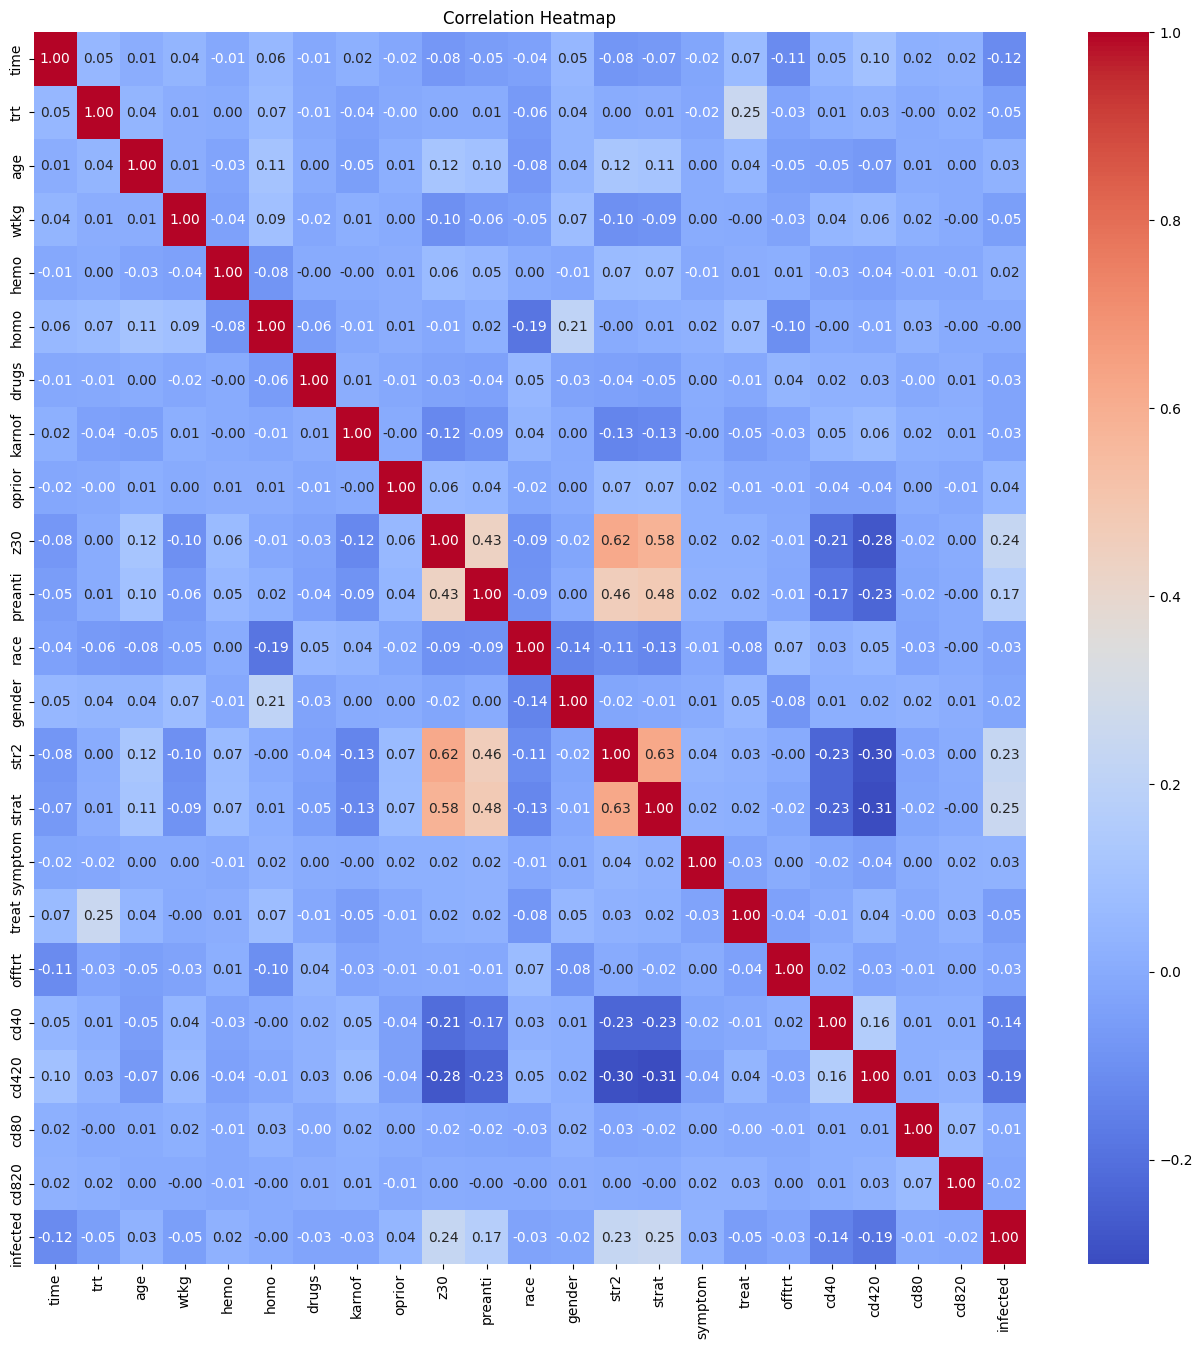

In [29]:
# Heatmap for correlation
plt.figure(figsize=(16, 16))
correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### MODELLING

In [30]:
#Model Building
X = merged_data.drop('infected', axis=1)  # Features
y = merged_data['infected']  # Target variable

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# Step 6: Model Evaluation
y_pred = model.predict(X_test)

In [35]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[9146  797]
 [3390 1095]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.81      9943
           1       0.58      0.24      0.34      4485

    accuracy                           0.71     14428
   macro avg       0.65      0.58      0.58     14428
weighted avg       0.68      0.71      0.67     14428

Accuracy Score: 0.7098003881341836
